# Notebook to test Parameters of hapROH runs on Mosaic data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec
import socket
import os as os
import sys as sys
import multiprocessing as mp
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

sys.path.append("./Notebooks/Mosaic1000G_Analysis/mosaic_test/")  # Assume we are in Hapsburg Root Directory
#sys.path.append("./package/hapsburg/")  # Assume we are in Hapsburg Root Directory

#from hmm_inference import HMM_Analyze   # Do not move. Should be after sys.path..
from load_funcs import Summary_ROH_Calls, Summary_ROH_Calls_Error, Summary_ROH_Calls_Missing,\
                        statistics_power_df, calc_power, give_SE, give_bias,\
                        false_power_statistics

from plot_funcs import plot_power, plot_fp_distribution

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

midway2-0402.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


# Test Statistics of replicate runs (of single copy length)
See  
https://docs.google.com/spreadsheets/d/1QhajP9yk6hzMoIiBzyriSARWuOWnBLei78ZOKS7QMUE/edit?usp=sharing  
for tabulation of results

### Report Parameters for a single Replicate
(Modify parameters for run of interest)

In [65]:
mosaic_folder = "./Simulated/1000G_Mosaic/TSI5/lambda_rc0.1/"
output_prefix =  "ph_c999/"
n_iid = 100
blen_cm = 4

roh = Summary_ROH_Calls(mosaic_folder=mosaic_folder, ch=3, nr_iid = n_iid, 
                        blen_cm = blen_cm, output_prefix = output_prefix)

df_calls = roh.collect_power_df()
statistics_power_df(df_calls)
calc_power(df_calls)
bias = give_bias(df_calls, blen_cm)
se = give_SE(df_calls)
print(f"Bias: {bias:.4f}")
print(f"Standard Error: {se:.4f}")

roh = Summary_ROH_Calls(mosaic_folder = mosaic_folder, ch=3, nr_iid = n_iid, blen_cm = 0, 
                        output_prefix = output_prefix, output=True)
print("False Positives:")
df_calls = roh.collect_power_df()

100 unique Individuals
339 / 500 Blocks called
85 Blocks called > 80.0 %
2.7392 average Block Length cM (called)
Bias: -2.1428
Standard Error: 1.6303
False Positives:
Total Nr Simulated: 0
Total Nr Called: 181


In [66]:
mosaic_folder = "./Simulated/1000G_Mosaic/TSI5/lambda_rc0.1/"
output_prefix =  "c999/"
n_iid = 100
blen_cm = 4

roh = Summary_ROH_Calls(mosaic_folder=mosaic_folder, ch=3, nr_iid = n_iid, 
                        blen_cm = blen_cm, output_prefix = output_prefix)

df_calls = roh.collect_power_df()
statistics_power_df(df_calls)
calc_power(df_calls)
bias = give_bias(df_calls, blen_cm)
se = give_SE(df_calls)
print(f"Bias: {bias:.4f}")
print(f"Standard Error: {se:.4f}")

roh = Summary_ROH_Calls(mosaic_folder = mosaic_folder, ch=3, nr_iid = n_iid, blen_cm = 0, 
                        output_prefix = output_prefix, output=True)
print("False Positives:")
df_calls = roh.collect_power_df()

100 unique Individuals
348 / 500 Blocks called
94 Blocks called > 80.0 %
2.7184 average Block Length cM (called)
Bias: -2.1080
Standard Error: 1.5533
False Positives:
Total Nr Simulated: 0
Total Nr Called: 113


### Plot Distribution of FP

Found 113 FP blocks
Average Block length: 0.0172 cM
Maximum Block length: 0.0506 cM


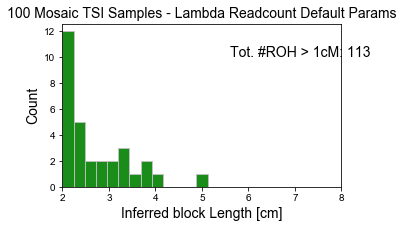

In [55]:
roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/TSI5/lambda_rc0.1/", ch=3, nr_iid = 100, 
                        blen_cm = 0, output_prefix = "c999/")
df_call_fp = roh.collect_fp_df()
false_power_statistics(df_call_fp)  # Do give some written statistics

bins = np.linspace(2, 8, 26)
plot_fp_distribution(df_call_fp, bins=bins,
                     title = "100 Mosaic TSI Samples - Lambda Readcount Default Params",
                     figsize=(5,3), xlim=[2,8])

### Plot False Positive for Downsampled Pseudo-Haploid Data

Found 223 FP blocks
Average Block length: 0.0161 cM
Maximum Block length: 0.0378 cM


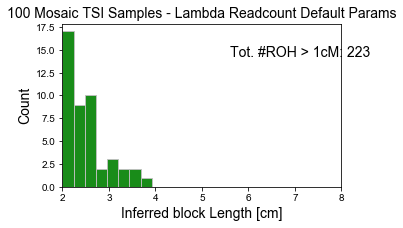

In [56]:
roh = Summary_ROH_Calls_Missing(mosaic_folder="./Simulated/1000G_Mosaic/TSI5/", 
                                ch=3, nr_iid = 100, missing=0.1,
                                blen_cm = 0, output_prefix = "merged/")
df_call_fp = roh.collect_fp_df()
false_power_statistics(df_call_fp)  # Do give some written statistics

bins = np.linspace(2, 8, 26)
plot_fp_distribution(df_call_fp, bins=bins,
                     title = "100 Mosaic TSI Samples - Lambda Readcount Default Params",
                     figsize=(5,3), xlim=[2,8])

In [26]:
np.sum(df_call_fp["lengthM"]>0.02)

266

Found 64 FP blocks
Average Block length: 0.0123 cM
Maximum Block length: 0.0211 cM


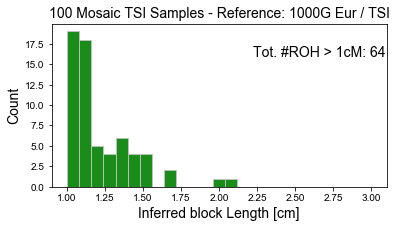

In [20]:
roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/TSI5/", ch=3, nr_iid = 40, 
                        blen_cm = 0, output_prefix = "0999/")
df_call_fp = roh.collect_fp_df()
false_power_statistics(df_call_fp)  # Do give some written statistics
plot_fp_distribution(df_call_fp, title = "100 Mosaic TSI Samples - Reference: 1000G Eur / TSI",
                    figsize=(6,3))

# Plot bias/power/se/fp rate

In [2]:
def load_line_search(cutoffs=[], mosaic_folder = "./Simulated/1000G_Mosaic/TSI6/",
                    ch=3, nr_iid=20, blen_cm=4, min_overlap=0.8, savepath=""):
    """Load Line and Return Line Search Statistics
    for posterior"""
    
    pfixes = [str(c).replace(".", "") + "/" for c in cutoffs]
    n = len(pfixes)
    sts = np.zeros(n, dtype="float")
    fps = np.zeros(n, dtype="float")
    fps2 = np.zeros(n, dtype="float")
    power = np.zeros(n, dtype="float")
    bias = np.zeros(n, dtype="float")
    
    for i,p in enumerate(pfixes):
        output_prefix= pfixes[i]
        roh = Summary_ROH_Calls(mosaic_folder=mosaic_folder, ch=ch, nr_iid = nr_iid, blen_cm = blen_cm, 
                                output_prefix = output_prefix)

        df_calls = roh.collect_power_df()
        bias[i] = np.mean(df_calls["CalledLength"] - df_calls["OriginalLength"])
        power[i] = np.mean(df_calls["OverlapFrac"] > min_overlap)
        calc_power(df_calls)
        sts[i] = give_SE(df_calls)
        roh = Summary_ROH_Calls(mosaic_folder = mosaic_folder, ch=3, nr_iid = nr_iid, blen_cm = 0, 
                                output_prefix = output_prefix, output=False)
        df_call_fp = roh.collect_fp_df()
        fps[i] = len(df_call_fp)/nr_iid
        fps2[i] = np.sum(df_call_fp["lengthM"]>0.02)/nr_iid
        
    ### Put into 1 Dataframe
    df = pd.DataFrame({"Posterior Cutoff":cutoffs, "Replicates":nr_iid, "STD. Length Called 4cM":sts, 
                       "False Positive ROH>1cM / Chr. 3":fps,
                       "False Positive ROH>2cM / Chr. 3": fps2,
                       "Avg. Length Bias 4 cM [cM]":bias, "Fraction of 80% of 4 cM Block detected":power})
    
    if len(savepath)>0:
        df.to_csv(savepath, index=False)
        print(f"Saved Output Table to {savepath}")
    return df

### The worst case [0.5x PH, 1% error]

In [7]:
cutoffs = [0.9, 0.99, 0.992, 0.994, 0.996, 0.998, 0.999, 0.9999, 0.99999]
#cutoffs = [0.99, 0.992, 0.994, 0.996, 0.998]
#cutoffs = [0.9, 0.99, 0.992, 0.994, 0.996, 0.997, 0.998, 0.999, 0.9999, 0.99999] # Run with 20 Individuals
#cutoffs = [0.996, 0.997, 0.998, 0.999]  # Run with 100 individiuals
df = load_line_search(cutoffs, mosaic_folder = "./Simulated/1000G_Mosaic/TSI6/",
                      ch=3, nr_iid=20, blen_cm=4, min_overlap=0.8,
                      savepath = "./TablesOut/var_post_cutoff.csv")

Saved Output Table to ./TablesOut/var_post_cutoff.csv


In [8]:
df.to_latex()

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n{} &  Posterior Cutoff &  Replicates &  STD. Length Called 4cM &  False Positive ROH>1cM / Chr. 3 &  False Positive ROH>2cM / Chr. 3 &  Avg. Length Bias 4 cM [cM] &  Fraction of 80\\% of 4 cM Block detected \\\\\n\\midrule\n0 &           0.90000 &          20 &                0.686527 &                             16.1 &                             2.95 &                    0.570660 &                                    1.00 \\\\\n1 &           0.99000 &          20 &                0.587713 &                              7.6 &                             0.65 &                    0.233491 &                                    0.97 \\\\\n2 &           0.99200 &          20 &                0.509959 &                              6.8 &                             0.65 &                    0.232956 &                                    0.98 \\\\\n3 &           0.99400 &          20 &                0.510417 &                              6.0 &        

In [9]:
print(df.to_latex(index=False))

\begin{tabular}{rrrrrrr}
\toprule
 Posterior Cutoff &  Replicates &  STD. Length Called 4cM &  False Positive ROH>1cM / Chr. 3 &  False Positive ROH>2cM / Chr. 3 &  Avg. Length Bias 4 cM [cM] &  Fraction of 80\% of 4 cM Block detected \\
\midrule
          0.90000 &          20 &                0.686527 &                             16.1 &                             2.95 &                    0.570660 &                                    1.00 \\
          0.99000 &          20 &                0.587713 &                              7.6 &                             0.65 &                    0.233491 &                                    0.97 \\
          0.99200 &          20 &                0.509959 &                              6.8 &                             0.65 &                    0.232956 &                                    0.98 \\
          0.99400 &          20 &                0.510417 &                              6.0 &                             0.55 &               

In [ ]:
df

### The best case

In [4]:
cutoffs = [0.998, 0.999, 0.9995]
df = load_line_search(cutoffs, mosaic_folder = "./Simulated/1000G_Mosaic/TSI5/",
                      ch=3, nr_iid=40, blen_cm=4, min_overlap=0.8,
                      savepath = "./TablesOut/var_post_cutoff_bestcase.csv")

Saved Output Table to ./TablesOut/var_post_cutoff_bestcase.csv


In [8]:
df

,Posterior Cutoff,Replicates,STD. Length Called 4cM,False Positive ROH>1cM / Chr. 3,False Positive ROH>2cM / Chr. 3,Avg. Length Bias 4 cM [cM],Fraction of 80% of 4 cM Block detected
0,0.9980,40,0.395002,2.925,0.050,0.091163,0.985
1,0.9990,40,0.381483,1.600,0.025,0.029897,0.975
2,0.9995,40,0.418690,1.000,0.000,-0.048573,0.945


plt.figure()
ax=plt.gca()
ax.plot(1-df["Posterior Cutoff"], df["STD. Length Called 4cM"], "o--", ms=7, lw=2)
ax.set_xscale("log")
ax.set_ylabel("STD")
plt.show()

# Analyze Missing PHs

In [5]:
mosaic_folder = "./Simulated/1000G_Mosaic/TSI5/"
output_prefix =  "0999/"
n_iid = 100
blen_cm = 4
missing=0.2

roh = Summary_ROH_Calls_Missing(mosaic_folder=mosaic_folder, ch=3, nr_iid = n_iid, 
                        blen_cm = blen_cm, output_prefix = output_prefix, missing=missing)

df_calls = roh.collect_power_df()
statistics_power_df(df_calls)
calc_power(df_calls)
se = give_SE(df_calls)
print(f"Standard Error: {se:.4f}")

roh = Summary_ROH_Calls_Missing(mosaic_folder = mosaic_folder, ch=3, nr_iid = n_iid, blen_cm = 0, 
                        output_prefix = output_prefix, output=True, missing=missing)
print("False Positives:")
df_calls = roh.collect_power_df()

100 unique Individuals
494 / 500 Blocks called
350 Blocks called > 80.0 %
3.6422 average Block Length cM (called)
Standard Error: 0.9503
False Positives:
Total Nr Simulated: 0
Total Nr Called: 445


Found 223 FP blocks
Average Block length: 0.0161 cM
Maximum Block length: 0.0378 cM


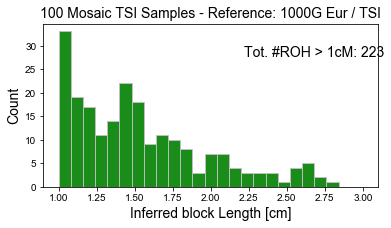

In [28]:
mosaic_folder = "./Simulated/1000G_Mosaic/TSI5/"
output_prefix =  "0999/"
n_iid = 100

roh = Summary_ROH_Calls_Missing(mosaic_folder=mosaic_folder, ch=3, nr_iid = n_iid, 
                        blen_cm = 0, output_prefix = output_prefix, missing=0.1)
df_call_fp = roh.collect_fp_df()
false_power_statistics(df_call_fp)  # Do give some written statistics
plot_fp_distribution(df_call_fp, title = "100 Mosaic TSI Samples - Reference: 1000G Eur / TSI",
                    figsize=(6,3))

# Merge Gaps and test the behaviour

# Area 51